In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

In [26]:
dataset = pd.read_csv('depression_data.csv')

In [27]:
dataset.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


## 1. Data Cleaning

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10314 non-null  int64 
 1   message     10314 non-null  object
 2   label       10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [29]:
dataset.drop(dataset.columns[0], axis = 1, inplace = True)

In [30]:
dataset.rename(columns={'message':'text'}, inplace=True)

In [31]:
dataset.head()

,text,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [34]:
# #missing values
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [35]:
#duplicate values
dataset.duplicated().sum()

31

In [36]:
#removing duplicate values
dataset = dataset.drop_duplicates(keep='first')

In [37]:
dataset.duplicated().sum()

0

In [38]:
dataset.shape

(10283, 2)

## 2. EDA

In [39]:
dataset['label'].value_counts()

0    7996
1    2287
Name: label, dtype: int64

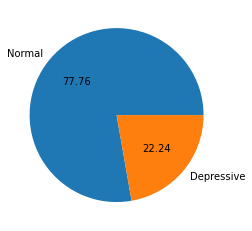

In [40]:
plt.pie(dataset['label'].value_counts(), labels=['Normal', 'Depressive'], autopct='%0.2f')
plt.show()

In [41]:
# Data is imbalanced

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moinul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
# Number of characters
dataset['num_characters'] = dataset['text'].apply(len)

In [44]:
dataset.sample(5)

,text,label,num_characters
8424,i use video games to cope with my depression,1,44
3209,Goin out with my friends!!,0,27
2115,#livechat now on! Need tips on PR or using twi...,0,119
3005,"Good morning Tweet Tweet )) Just woke up , gon...",0,140
3176,@gleea i hate the game playing too. that is w...,0,99


In [45]:
# Number of words
dataset['text'].apply(lambda x: nltk.word_tokenize(x))

0        [just, had, a, real, good, moment, ., i, misss...
1        [is, reading, manga, http, :, //plurk.com/p/mz...
2        [@, comeagainjen, http, :, //twitpic.com/2y2lx...
3        [@, lapcat, Need, to, send, 'em, to, my, accou...
4        [ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo...
                               ...                        
10309    [No, Depression, by, G, Herbo, is, my, mood, f...
10310    [What, do, you, do, when, depression, succumbs...
10311    [Ketamine, Nasal, Spray, Shows, Promise, Again...
10312    [dont, mistake, a, bad, day, with, depression,...
10313                                                  [0]
Name: text, Length: 10283, dtype: object

In [46]:
dataset['num_words'] = dataset['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [47]:
dataset.head()

,text,label,num_characters,num_words
0,just had a real good moment. i missssssssss hi...,0,57,13
1,is reading manga http://plurk.com/p/mzp1e,0,42,6
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84,11
3,@lapcat Need to send 'em to my accountant tomo...,0,135,29
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45,8


In [48]:
dataset[dataset['label'] == 0]['text'].iloc[30]

"got the magic numbers and is thanking y'all for the support "

In [49]:
# Number of sentences
dataset['text'].apply(lambda x: nltk.sent_tokenize(x))

0        [just had a real good moment., i missssssssss ...
1             [is reading manga  http://plurk.com/p/mzp1e]
2        [@comeagainjen http://twitpic.com/2y2lx - http...
3        [@lapcat Need to send 'em to my accountant tom...
4          [ADD ME ON MYSPACE!!!, myspace.com/LookThunder]
                               ...                        
10309    [No Depression by G Herbo is my mood from now ...
10310    [What do you do when depression succumbs the b...
10311    [Ketamine Nasal Spray Shows Promise Against De...
10312    [dont mistake a bad day with depression!, ever...
10313                                                  [0]
Name: text, Length: 10283, dtype: object

In [50]:
dataset['num_sentences'] = dataset['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [51]:
dataset.head()

,text,label,num_characters,num_words,num_sentences
0,just had a real good moment. i missssssssss hi...,0,57,13,2
1,is reading manga http://plurk.com/p/mzp1e,0,42,6,1
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84,11,1
3,@lapcat Need to send 'em to my accountant tomo...,0,135,29,3
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45,8,2


In [52]:
dataset[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10283.000000,10283.000000,10283.000000
mean,92.632889,18.956919,1.754546
std,64.688359,12.492378,1.027083
min,1.000000,1.000000,1.000000
25%,48.000000,10.000000,1.000000
50%,78.000000,16.000000,1.000000
75%,119.000000,25.000000,2.000000
max,874.000000,148.000000,17.000000


In [53]:
# Normal Tweets
dataset[dataset['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7996.000000,7996.000000,7996.000000
mean,73.579290,16.163832,1.736368
std,35.860334,8.540448,0.967920
min,8.000000,1.000000,1.000000
25%,44.000000,9.000000,1.000000
50%,69.000000,15.000000,1.000000
75%,102.000000,22.000000,2.000000
max,232.000000,98.000000,17.000000


In [54]:
# Depressive Tweets
dataset[dataset['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2287.000000,2287.000000,2287.000000
mean,159.249672,28.722344,1.818102
std,92.813769,18.003823,1.209530
min,1.000000,1.000000,1.000000
25%,87.000000,15.000000,1.000000
50%,139.000000,24.000000,1.000000
75%,232.000000,41.000000,2.000000
max,874.000000,148.000000,10.000000


In [55]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

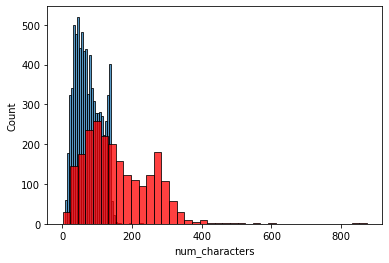

In [56]:
sns.histplot(dataset[dataset['label'] == 0]['num_characters'])
sns.histplot(dataset[dataset['label'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

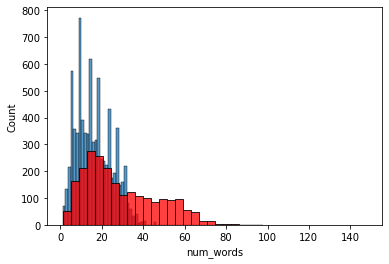

In [57]:
sns.histplot(dataset[dataset['label'] == 0]['num_words'])
sns.histplot(dataset[dataset['label'] == 1]['num_words'], color='red')

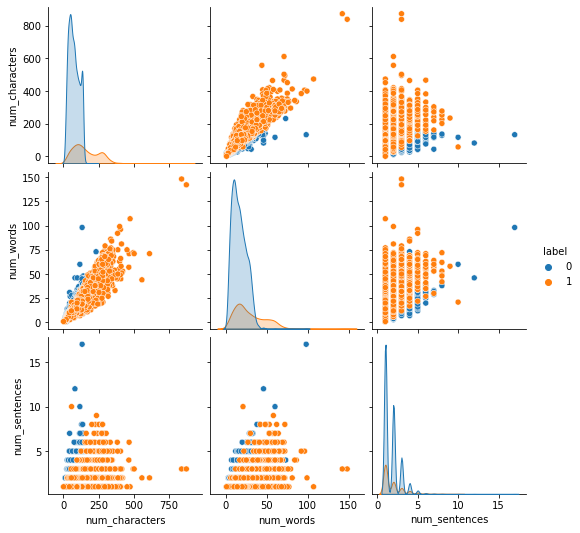

In [58]:
sns.pairplot(dataset,hue='label')

<AxesSubplot:>

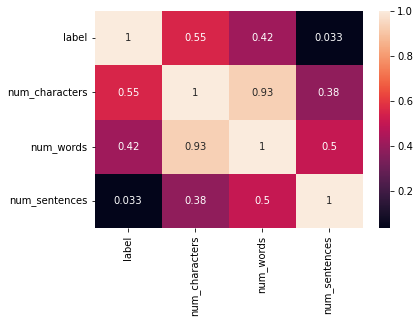

In [59]:
sns.heatmap(dataset.corr(), annot=True)

## 3. Data Preprocessing

*   Lower Case
*   Removing special characters
*   Removing stopwords and punctuations
*   Stemming





In [60]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moinul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [62]:
def preprocess_text(text):
    text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]', ' ', text)
    text = text.lower()  # Convert text to lowercase
    ps = PorterStemmer()  # Initialize Porter Stemmer
    all_stopwords = set(stopwords.words('english'))  # Get all English stopwords
    words = text.split()  # Split text into words
    cleaned_words = [ps.stem(word) for word in words if word not in all_stopwords]  # Apply stemming and remove stopwords
    cleaned_text = ' '.join(cleaned_words)  # Join cleaned words back into text
    return cleaned_text


In [63]:
preprocess_text(dataset['text'][1])

'read manga'

In [64]:
dataset['text'][1]

'is reading manga  http://plurk.com/p/mzp1e'

In [65]:
dataset['transformed_text'] = dataset['text'].apply(preprocess_text)

In [66]:
dataset['transformed_text']

0                       real good moment missssssssss much
1                                               read manga
2                                                         
3        need send em account tomorrow oddli even refer...
4                          add myspac myspac com lookthund
                               ...                        
10309        depress g herbo mood done stress peopl deserv
10310    depress succumb brain make feel like never enough
10311    ketamin nasal spray show promis depress suicid...
10312               dont mistak bad day depress everyon em
10313                                                    0
Name: transformed_text, Length: 10283, dtype: object

In [67]:
dataset['text'][0]

'just had a real good moment. i missssssssss him so much, '

In [68]:
dataset['transformed_text'][0]

'real good moment missssssssss much'

In [69]:
dataset[['text', 'label', 'transformed_text']].sample(5)

,text,label,transformed_text
8781,me after taking a depression nap https://twit...,1,take depress nap
9082,My life is just one long anxiety attack strewn...,1,life one long anxieti attack strewn depress et...
8488,"@jbouie Reading his other tweets, he is trying...",1,read tweet tri think posit get mild depress funk
7583,June Rent Free! @ http://twtqpon.com/21wc2g ...,0,june rent free twtqpon
5878,"@TyCity yes, thank you for refreshing my memory.",0,ye thank refresh memori


### WordCloud Visualization

In [70]:
from wordcloud import WordCloud
wc = WordCloud(width=1500,height=1000,min_font_size=10)

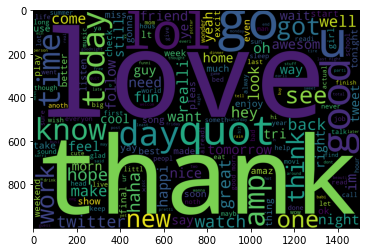

In [71]:
# Normal Tweets
normal_wc = wc.generate(dataset[dataset['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(normal_wc)

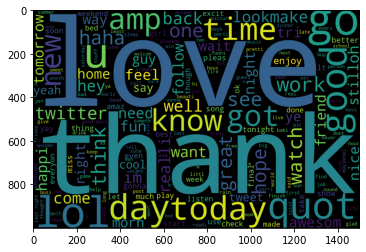

In [72]:
# Depressive Tweets
depress_wc = wc.generate(dataset[dataset['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(depress_wc)

In [73]:
normal_corpus = []
for msg in dataset[dataset['label'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    normal_corpus.append(word)

In [74]:
len(normal_corpus)

55782

In [75]:
from collections import Counter
df1 = pd.DataFrame(Counter(normal_corpus).most_common(30))

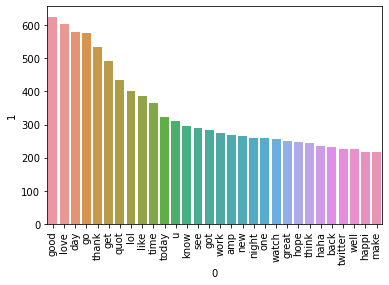

In [76]:
sns.barplot(x=df1[0], y=df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
depress_corpus = []
for msg in dataset[dataset['label'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    depress_corpus.append(word)

In [78]:
len(depress_corpus)

30159

In [79]:
df2 = pd.DataFrame(Counter(depress_corpus).most_common(30))

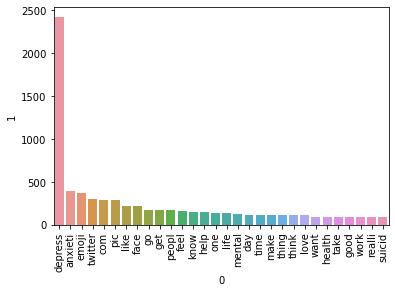

In [80]:
sns.barplot(x=df2[0],y=df2[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [81]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
# tfidf
tfidf = TfidfVectorizer()

In [82]:
dataset.isnull().sum()

text                0
label               0
num_characters      0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

In [83]:
dataset['transformed_text']

0                       real good moment missssssssss much
1                                               read manga
2                                                         
3        need send em account tomorrow oddli even refer...
4                          add myspac myspac com lookthund
                               ...                        
10309        depress g herbo mood done stress peopl deserv
10310    depress succumb brain make feel like never enough
10311    ketamin nasal spray show promis depress suicid...
10312               dont mistak bad day depress everyon em
10313                                                    0
Name: transformed_text, Length: 10283, dtype: object

In [84]:
X = tfidf.fit_transform(dataset['transformed_text']).toarray()

In [85]:
X.shape

(10283, 12363)

In [86]:
y = dataset['label'].values

In [87]:
tfidf.vocabulary_

{'real': 8988,
 'good': 4633,
 'moment': 7243,
 'missssssssss': 7181,
 'much': 7372,
 'read': 8982,
 'manga': 6810,
 'need': 7547,
 'send': 9664,
 'em': 3601,
 'account': 480,
 'tomorrow': 11015,
 'oddli': 7837,
 'even': 3772,
 'refer': 9056,
 'tax': 10709,
 'support': 10541,
 'evid': 3790,
 'though': 10883,
 'add': 513,
 'myspac': 7450,
 'com': 2428,
 'lookthund': 6598,
 'sleepi': 9968,
 'time': 10939,
 'tonight': 11025,
 'nbn': 7530,
 'someon': 10106,
 'alreadi': 706,
 'said': 9437,
 'fiber': 4044,
 'home': 5230,
 'mean': 6943,
 'least': 6370,
 'regular': 9078,
 '23': 130,
 '24': 133,
 'possibl': 8557,
 'today': 10987,
 'nice': 7620,
 'nite': 7666,
 'twittervil': 11274,
 'workout': 12024,
 'ciao': 2275,
 'night': 7635,
 'darlin': 2893,
 'sweet': 10590,
 'dream': 3384,
 'morn': 7299,
 'everybodi': 3782,
 'final': 4076,
 'creat': 2702,
 'wordpress': 12014,
 'blog': 1531,
 'seattl': 9611,
 'coffe': 2393,
 'commun': 2454,
 'kisha': 6158,
 'cnt': 2369,
 'get': 4511,
 'til': 10934,
 'frm':

In [88]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [89]:
X[:4]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### GaussianNB

In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(f1_score(y_test, y_pred1))

0.5862907146329607
[[840 760]
 [ 91 366]]
0.4624131396083386


#### MultinomialNB

In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(f1_score(y_test, y_pred2))

0.9231891103548857
[[1598    2]
 [ 156  301]]
0.7921052631578948


#### BernoulliNB

In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(f1_score(y_test, y_pred3))

0.982498784637822
[[1597    3]
 [  33  424]]
0.9592760180995474


In [96]:
# Tfidf -> BNB

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:
svc = SVC(kernel='sigmoid', gamma=1.0)
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [99]:
clfs = {
    'SVC' : svc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [100]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1_score_ = f1_score(y_test,y_pred)

    return accuracy,f1_score_

In [101]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9956246961594555, 0.9900771775082691)

In [102]:
accuracy_scores = []
f1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_f1_score = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("F1_Score - ",current_f1_score)

    accuracy_scores.append(current_accuracy)
    f1_scores.append(current_f1_score)

For  SVC
Accuracy -  0.9956246961594555
F1_Score -  0.9900771775082691
For  NB
Accuracy -  0.982498784637822
F1_Score -  0.9592760180995474
For  DT
Accuracy -  0.997569275644142
F1_Score -  0.9945115257958288
For  LR
Accuracy -  0.9961108410306271
F1_Score -  0.9911894273127754
For  RF
Accuracy -  0.9980554205153136
F1_Score -  0.9956140350877193
For  AdaBoost
Accuracy -  0.9970831307729704
F1_Score -  0.9934210526315789
For  BgC
Accuracy -  0.997569275644142
F1_Score -  0.9945115257958288
For  ETC
Accuracy -  0.9922216820612543
F1_Score -  0.9823399558498895
For  GBDT
Accuracy -  0.997569275644142
F1_Score -  0.9945115257958288
For  xgb
Accuracy -  0.9970831307729704
F1_Score -  0.9934065934065934


In [103]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'F1_Score':f1_scores}).sort_values(by='F1_Score', ascending=False)

In [104]:
performance_df

,Algorithm,Accuracy,F1_Score
4,RF,0.998055,0.995614
2,DT,0.997569,0.994512
6,BgC,0.997569,0.994512
8,GBDT,0.997569,0.994512
5,AdaBoost,0.997083,0.993421
9,xgb,0.997083,0.993407
3,LR,0.996111,0.991189
0,SVC,0.995625,0.990077
7,ETC,0.992222,0.982340
1,NB,0.982499,0.959276


In [105]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [106]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.998055
1,DT,Accuracy,0.997569
2,BgC,Accuracy,0.997569
3,GBDT,Accuracy,0.997569
4,AdaBoost,Accuracy,0.997083
5,xgb,Accuracy,0.997083
6,LR,Accuracy,0.996111
7,SVC,Accuracy,0.995625
8,ETC,Accuracy,0.992222
9,NB,Accuracy,0.982499


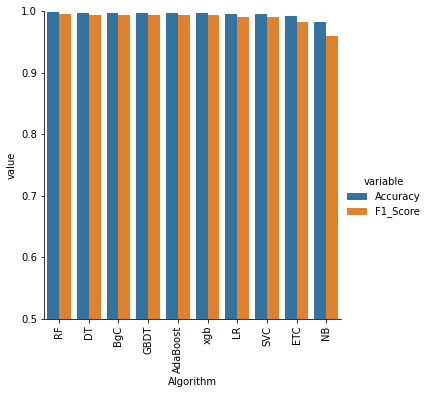

In [107]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [108]:
y_pred = rfc.predict(X_test)

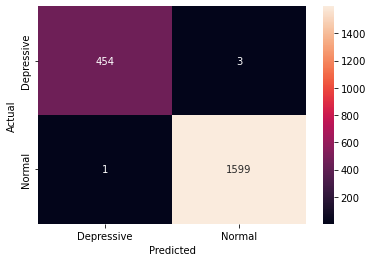

In [109]:
label_map = {1: 'Depressive', 0: 'Normal'}  # Map numeric labels to text
cm = confusion_matrix(y_test, y_pred, labels=list(label_map.keys()))  # Create confusion matrix directly with labels

sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [110]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))